In [20]:
pwd

'/Users/mialu/Documents/Course22Fall/TReNDS/neuroneural/BrainPlots/scripts'

# Import library

In [21]:
# Import Libraries for Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.cm as cm
import numpy as np
import pickle

import os
# os.listdir()

In [22]:
pre = '/Users/mialu/Documents/Course22Fall/TReNDS/MeshEvaluation/william-csv'

In [23]:
f1 = 'grouped4.pkl'
f2 = 'grouped5.pkl'

f1 = os.path.join(pre, f1)
f2 = os.path.join(pre, f2)

In [24]:
with open(f1,'rb') as f:
    grouped4 = pickle.load(f)
with open(f2,'rb') as f:
    grouped5 = pickle.load(f)

In [25]:
grouped4

model_name
cortexode       [3.841084608589097, 3.417714939182867, 3.32185...
corticalflow    [1.0449564173825163, 1.2664224355735219, 1.588...
deepcsr         [0.7771185347607378, 0.8611948011427346, 1.168...
freesurfer      [1.439945440172773, 1.6276769263297792, 1.6983...
vox2cortex      [2.165944685104965, 1.8612843337934977, 2.0790...
Name: ratio_percent, dtype: object

In [26]:
lens4 = [len(i) for i in grouped4]
models = ['CortexODE','CorticalFlow','DeepCSR','*FreeSurfer','Vox2Cortex']
modelnames = []
cutornocut = []
ratio = []
for i in range(5):
    modelnames += [models[i]] * lens4[i] 
    cutornocut += ['Original'] * lens4[i]
    ratio += grouped4[i]
    
lens5 = [len(i) for i in grouped4]
for i in range(5):
    modelnames += [models[i]] * lens5[i] 
    cutornocut += ['Medial wall removed'] * lens5[i]
    ratio += grouped5[i]
    
data = {'model': modelnames, 'cut or no cut': cutornocut, 'ratio': ratio}

df_pivot = pd.DataFrame(data)

# plot

In [27]:
df_pivot = df_pivot.sort_values(by = ['model','cut or no cut'], ascending=[True,False])

In [28]:
df_pivot

,model,cut or no cut,ratio
321,*FreeSurfer,Original,1.439945
322,*FreeSurfer,Original,1.627677
323,*FreeSurfer,Original,1.698364
324,*FreeSurfer,Original,1.599895
325,*FreeSurfer,Original,1.985556
...,...,...,...
1063,Vox2Cortex,Medial wall removed,0.221355
1064,Vox2Cortex,Medial wall removed,0.021421
1065,Vox2Cortex,Medial wall removed,0.000000
1066,Vox2Cortex,Medial wall removed,0.000000


In [50]:
sns.set(rc={'figure.figsize':(15,6)})
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.5)

def plot(tips, x, y, hue,medians,order = ['CortexODE','*FreeSurfer','CorticalFlow','Vox2Cortex','DeepCSR']
,color = sns.color_palette("Set2", 10), labelrename=['Spherical topology', 'Medial wall removed']):
    sns.stripplot(x=x, y=y, hue=hue,
    data=tips, jitter=.2,dodge=.5,
    palette="Set2",linewidth=1,edgecolor='gray',alpha=.5,order=order)

    # Get the ax object to use later.
    ax = sns.boxplot(x=x,y=y,hue=hue,
    data=tips,palette="Set2",fliersize=0,order=order)
    
    tx = tips.groupby(by = [x,hue])[y].median()
    
    vertical_offset = -.2

    # Get the handles and labels. For this example it'll be 2 tuples
    # of length 4 each.
    handles, labels = ax.get_legend_handles_labels()
    
#     print(len(ax.get_xticks()))
#     print(len(medians))

    c1,c2 = color[0],color[1]
    offxtick = -.6
    for xtick in ax.get_xticks():
        idx = 2 * xtick 
        ax.text(xtick + .1 + offxtick,medians[idx] + vertical_offset,medians[idx], 
            horizontalalignment='center',size='x-small',color=c1,weight='semibold')

        idx = 2 * xtick + 1
        ax.text(xtick + .5 + offxtick,medians[idx] + vertical_offset,medians[idx], 
            horizontalalignment='center',size='x-small',color=c2,weight='semibold')
               

    # When creating the legend, only use the first two elements
    # to effectively remove the last two.

    l = plt.legend(handles[0:2], labelrename, loc='upper right', borderaxespad=0., facecolor='white',edgecolor='white')
    # plt.ylabel('Collision counts / Triangle counts (%)')
    print(labels)
    plt.xlabel('')
    # plt.yscale('log')
    plt.ylabel('Cross-surface intersections (%)')
#     if name=='cut':
#         plt.ylabel('Self intersections\n without medial wall (%)')
    plt.xlim(-0.7, 4.5)
#     plt.ylim(-1,10.2)
    plt.ylim(-0.5,5.5)
    plt.savefig('Collisions.png', dpi=300)
    plt.savefig('Collisions.svg', format='svg', transparent=True, bbox_inches='tight', pad_inches=0)

## plot

In [51]:
def calc_medians(order = ['CortexODE','*FreeSurfer','CorticalFlow','Vox2Cortex','DeepCSR']):
    medians = []
    for i in order:
        t = df_pivot
        t = t[t['model']==i]
        medians.append(np.median(t[t['cut or no cut']=='Original']['ratio']))
        medians.append(np.median(t[t['cut or no cut']=='Medial wall removed']['ratio']))
    
    medians2 = [round(i,4) for i in medians]
    print(medians2)
    medians = [round(i,2) for i in medians]
    return medians

In [52]:
calc_medians()

[3.4125, 0.2187, 1.7959, 0.2073, 1.3418, 0.2126, 1.8351, 0.0916, 0.8859, 0.0437]


[3.41, 0.22, 1.8, 0.21, 1.34, 0.21, 1.84, 0.09, 0.89, 0.04]

In [53]:
order1 = ['CortexODE','Vox2Cortex','*FreeSurfer','CorticalFlow','DeepCSR']
order2 = ['CortexODE','CorticalFlow','*FreeSurfer','Vox2Cortex','DeepCSR']

[3.4125, 0.2187, 1.8351, 0.0916, 1.7959, 0.2073, 1.3418, 0.2126, 0.8859, 0.0437]
['Original', 'Medial wall removed', 'Original', 'Medial wall removed']


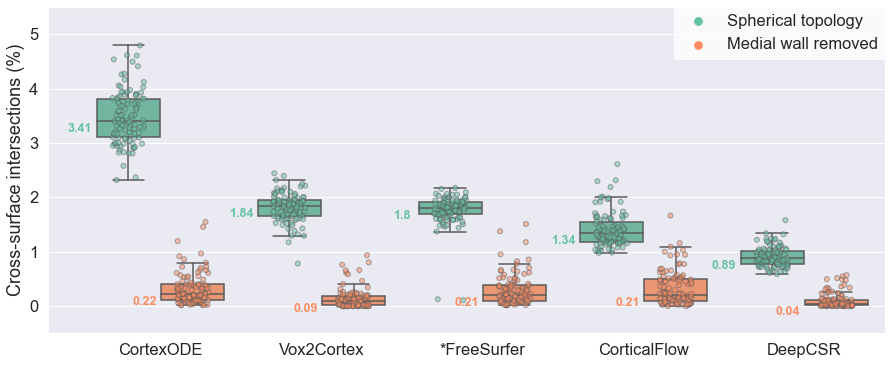

In [54]:

plot(df_pivot, "model","ratio","cut or no cut",calc_medians(order1),order=order1);

[3.4125, 0.2187, 1.3418, 0.2126, 1.7959, 0.2073, 1.8351, 0.0916, 0.8859, 0.0437]
['Original', 'Medial wall removed', 'Original', 'Medial wall removed']


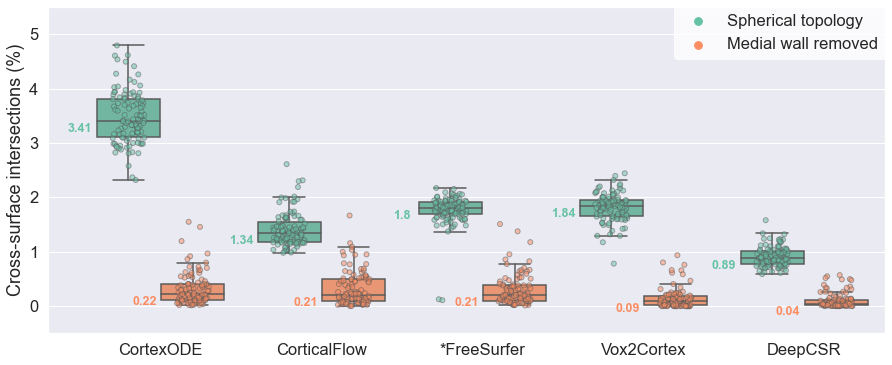

In [55]:
order = order2
plot(df_pivot, "model","ratio","cut or no cut",calc_medians(order),order=order);